### Setup

In [5]:
using Distributions
using Plots

"""
Compute a price path of `n` points, starting at `S₀`. The ratio of each point to the
previous point is assumed to be a geometric Brownian motion with drift parameters `μ`
and variance parameter `σ^2` whose unit time period is a trading year. The optional argument
`N` indicates the desired day-count convention for a trading year.
"""
function price_path(S₀, n, μ, σ, N = 252)
    X = Normal(μ/N,σ/√N)
    prices = zeros(n)
    prices[1] = S₀
    for i in 2:n
        prices[i] = prices[i-1]*ℯ^rand(X)
    end
    return prices
end

function experiment(days=60)
    initial_price = 50; drift = -0.1; variance = 0.5
    price_path(initial_price, days, drift, variance)
end;

### Predicting the Price

┌ Info: Saved animation to 
│   fn = /home/christopher/code/notebooks/price_paths.gif
└ @ Plots /home/christopher/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/home/christopher/code/notebooks/price_paths.gif")
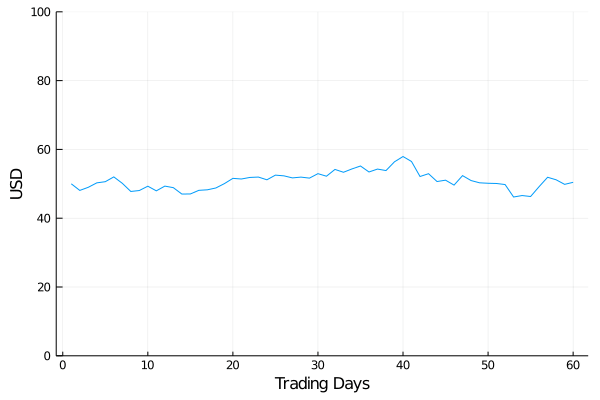

In [6]:
price_paths = @animate for _ in 1:100
    plot(experiment(); ylim=(0,100), legend=false, xlabel="Trading Days", ylabel="USD")
end
gif(price_paths, "price_paths.gif", fps=5)

┌ Info: Saved animation to 
│   fn = /home/christopher/code/notebooks/tmp.gif
└ @ Plots /home/christopher/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/home/christopher/code/notebooks/tmp.gif")
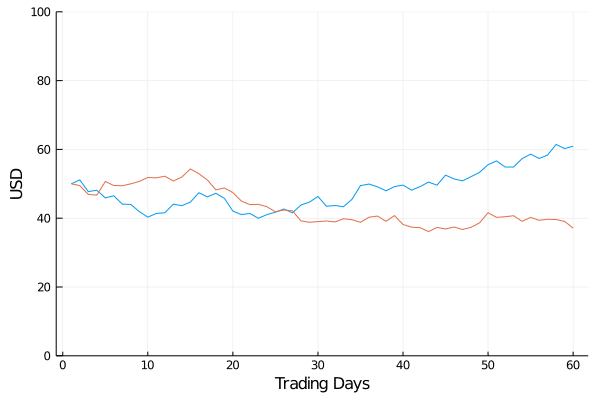

In [7]:
@gif for _ in 1:100
    plot!(experiment())
end

### Leverage CLT

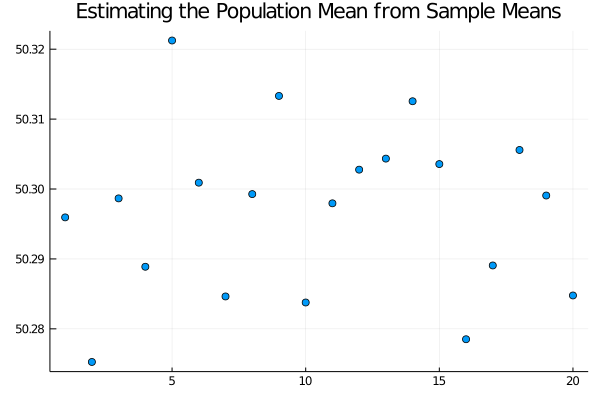

In [9]:
"""
Computate a final price without recording each individual price
"""
function price_estimate(S₀, n, μ = S₀/10, σ = μ/2, N = 252)
    X = Normal(μ/N,σ/√N)
    price = S₀
    for _ in 2:n
        price = price*ℯ^rand(X)
    end
    return price
end

sample_means = [mean((price_estimate(50, 60, -0.1,0.5) for _ in 1:1e5)) for _ in 1:20]
plot(sample_means, seriestype=:scatter, legend=false, title="Estimating the Population Mean from Sample Means")